In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Starting point: H$_2$ molecules in their electronic and vibrational ground state

Dissociation energy: 436 kJ/mol = 4,54 eV 
distance: 74pm https://de.wikipedia.org/wiki/Bindungsenergie_(Chemie)

In [2]:
#define potential
def morsePotential(R,De=10,a=0.3,Re=2):
    return De*(1-np.exp(-a*(R-Re)))**2
def crossInteraction(E,De=10,a=.3,Re=2):
    return (Re-np.log(1+np.sqrt(E/De))/a,Re-np.log(1-np.sqrt(E/De))/a)

In [3]:
r=np.linspace(0,20,1000)

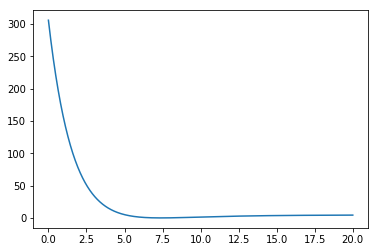

In [4]:
plt.plot(r,morsePotential(r,4.54,Re=7.4))

In [47]:
x,y=np.loadtxt('data/H2p_pot_gerade.dat',unpack=True)

(-0.2, 0.5)

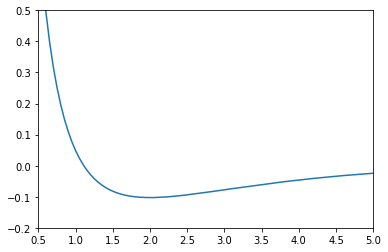

In [48]:
plt.plot(x,y)
plt.xlim(.5,5)
plt.ylim(-.2,.5)

In [50]:
x.size,x[0],x[-1]

(610, 0.05, 500.0)

Text(0, 0.5, 'distance')

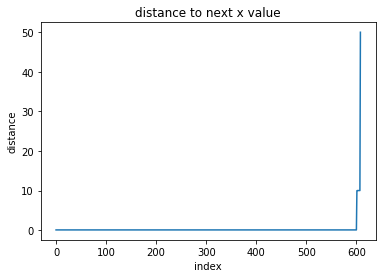

In [70]:
plt.plot(abs(np.array([0,*x]).flatten()-np.array([*x,600]).flatten())[:-2])
plt.title('distance to next x value')
plt.xlabel('index')
plt.ylabel('distance')

In [71]:
r,V=x[:600],y[:600]

In [72]:
import scipy.sparse as sparse # routines for sparse matrices
import scipy.sparse.linalg as LAs # 

In [125]:
L = 30
npoints = 600
dx = L/(npoints)
xvals = np.linspace(dx,L,npoints)
# terms of the Hamiltonian
HkinDiag = np.ones(npoints)/dx**2
Hkinofdiag = -0.5*np.ones(npoints-1)/dx**2
Hsparse = sparse.diags([Hkinofdiag, HkinDiag + V, Hkinofdiag],[-1,0,1])
#print(Hsparse.toarray())

e, v = sparse.linalg.eigsh(Hsparse, k=10, which='SA')

In [126]:
print(e)

[-0.00220732  0.01250332  0.03859103  0.07672989  0.12642333  0.18741347
  0.25958105  0.3428556   0.43718447  0.54252766]


In [120]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

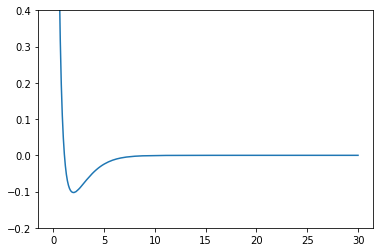

In [121]:
plt.plot(r,V)
plt.ylim(-.2,.4)
for j in e:
    plt.plot(r,j*np.ones(len(r)),lw=.8,c='black',zorder=0)